In [1]:
import pandas as pd 
import numpy as np 
from scipy import stats
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import xgboost as xgb
from xgboost import XGBClassifier 
from xgboost import XGBRegressor
from xgboost import plot_importance
import matplotlib.pylab as plt
from matplotlib import pyplot
import mlxtend
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
dataset = pd.read_csv("train_final.csv")
test_dataset = pd.read_csv("test_final.csv")

In [3]:
feature_cols = ['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24']
#feature_cols = ['f1','f3','f4','f7','f8','f10','f12','f13','f14','f15','f16','f17','f19','f23',]
# remove_feature_cols = ['f2','f5','f6','f9','f11','f18','f20','f21','f22','f24']
features_X = dataset[feature_cols]
target = 'Y'
IDcol = 'Id'
target_Y = dataset['Y']
test_feature = test_dataset[feature_cols]
test_Id = test_dataset['Id']
predictors = [x for x in features_X.columns if x not in [target,IDcol]]
# z = np.abs(stats.zscore(dataset))
# print(z)


In [101]:
param_test1 = {
    'max_depth':range(15,21,1),
    'min_child_weight':range(0,3,1)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( 
    learning_rate =0.09, 
    n_estimators=300, 
    max_depth=32,
    min_child_weight=0,
    gamma=0.0, 
    subsample=0.8, 
    colsample_bytree=0.15,
    objective= 'binary:logistic', 
    nthread=16, 
    scale_pos_weight=1, 
    seed=42,
    reg_lambda=0
), 
param_grid = param_test1, scoring='roc_auc',n_jobs=-1,iid=False, cv=10)
gsearch1.fit(dataset[predictors],dataset['Y'])
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([14.2894099 , 13.23287275, 10.84813693, 12.77226965, 11.58020208,
         11.09409249, 13.23767424, 11.70612984, 11.47837908, 13.77569454,
         12.26075454, 11.75164068, 14.0290519 , 12.31416664, 11.72943499,
         14.39603434, 12.44139526,  9.03452916]),
  'std_fit_time': array([1.26374482, 1.59155066, 0.09371846, 0.21937674, 0.3876864 ,
         0.27865565, 0.379551  , 0.34529406, 0.21497818, 0.38810221,
         0.18653528, 0.14187251, 0.21414279, 0.13752201, 0.09261719,
         0.20915218, 0.48888582, 1.20531217]),
  'mean_score_time': array([0.03640835, 0.01680388, 0.01910453, 0.02710621, 0.02120512,
         0.01760421, 0.03280776, 0.01640391, 0.01490369, 0.02870669,
         0.01620388, 0.01480355, 0.02910674, 0.01740406, 0.0186048 ,
         0.03040717, 0.01560373, 0.02080498]),
  'std_score_time': array([0.02926385, 0.00193963, 0.0123188 , 0.00225655, 0.01434023,
         0.00950135, 0.00997044, 0.00162546, 0.00094338, 0.00173536,
         0.0

In [94]:
param_test2 = {
    #gamma':[i/100 for i in range(0,6,1)]
#     'gamma':[0.01,0.02,0,0.03,0.001,0.0001,0.00001]
    'gamma':[.0001,.0002,.00015,.0003,0,0.1,0.02,1]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( 
    learning_rate =0.09, 
    n_estimators=300, 
    max_depth=20,
    min_child_weight=1,
    gamma=0.0, 
    subsample=0.8, 
    colsample_bytree=0.15,
    objective= 'binary:logistic', 
    nthread=16, 
    scale_pos_weight=1, 
    seed=42,
    reg_alpha=0,
    reg_lambda = 0

), 
param_grid = param_test2, scoring='roc_auc',n_jobs=-1,iid=False, cv=10)
gsearch1.fit(dataset[predictors],dataset['Y'])
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([14.30981457, 14.04325516, 12.06311026, 12.03710451, 12.07711349,
         12.00839784, 11.93138082, 11.59950593]),
  'std_fit_time': array([1.03548895, 1.68341746, 0.11441923, 0.17115836, 0.17504411,
         0.08888842, 0.14251077, 0.21188055]),
  'mean_score_time': array([0.02720618, 0.0213048 , 0.02710619, 0.02030478, 0.01730423,
         0.02560577, 0.02150481, 0.01750402]),
  'std_score_time': array([0.01949681, 0.0134418 , 0.02330966, 0.01325457, 0.00268566,
         0.02096752, 0.01920478, 0.01251088]),
  'param_gamma': masked_array(data=[0.0001, 0.0002, 0.00015, 0.0003, 0, 0.1, 0.02, 1],
               mask=[False, False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0001},
   {'gamma': 0.0002},
   {'gamma': 0.00015},
   {'gamma': 0.0003},
   {'gamma': 0},
   {'gamma': 0.1},
   {'gamma': 0.02},
   {'gamma': 1}],
  'split0_test_score': array([0.90739705, 0.90593128, 0.90519498, 

In [104]:
param_test3 = {
    'subsample':[i/1000.0 for i in range(820,826,1)],
    'colsample_bytree':[i/1000.0 for i in range(220,226,1)]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(
    learning_rate =0.09, 
    n_estimators=300, 
    max_depth=29,
    min_child_weight=0, 
    gamma=0.01, 
    subsample=0.82, 
    colsample_bytree=0.22,
    objective= 'binary:logistic', 
    nthread=16, 
    scale_pos_weight=1, 
    seed=21,
    reg_alpha = 0, 
    reg_lambda = 1
), 
param_grid = param_test3, scoring='roc_auc',n_jobs=-1,iid=False, cv=10)
gsearch1.fit(dataset[predictors],dataset['Y'])
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([22.71800296, 22.55376403, 20.7271565 , 20.6366353 , 20.71945426,
         20.63243492, 20.80167303, 20.97521167, 20.56211863, 20.57582188,
         20.63843582, 20.56982036, 20.68284602, 20.66694245, 20.51410761,
         20.44059162, 20.53121169, 20.64393728, 20.67134326, 20.7478605 ,
         20.68114491, 20.59702673, 20.51070712, 20.60542867, 21.19246023,
         21.15185111, 20.95630748, 20.47299883, 20.52631092, 20.58132341,
         20.46689756, 20.58932474, 20.47129834, 20.54341438, 20.46689758,
         14.22559555]),
  'std_fit_time': array([1.29676763, 1.56088272, 0.21551084, 0.28520818, 0.28798746,
         0.19446223, 0.26808606, 0.24871661, 0.15513639, 0.23354445,
         0.23162006, 0.23750661, 0.17889598, 0.18054954, 0.20387845,
         0.26691361, 0.25309829, 0.18793134, 0.26078473, 0.25853294,
         0.21971384, 0.20796222, 0.14520372, 0.26873789, 0.25657449,
         0.24869712, 0.21580063, 0.27748209, 0.24354191, 0.19427025,
         0.

In [91]:
param_test4 = {
    'reg_alpha':[0,0.1,1,0.01]
    #'reg_alpha':[0.1,0.2,0,1,2]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( 
    learning_rate =0.09, 
    n_estimators=300, 
    max_depth=20,
    min_child_weight=1,
    gamma=0.0, 
    subsample=0.8, 
    colsample_bytree=0.15,
    objective= 'binary:logistic', 
    nthread=16, 
    scale_pos_weight=1, 
    seed=42,
    reg_lambda=0
    
), 
param_grid = param_test4, scoring='roc_auc',n_jobs=-1,iid=False, cv=10)
gsearch1.fit(dataset[predictors],dataset['Y'])
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([11.59850626, 11.49418228,  9.45862489,  8.20384245]),
  'std_fit_time': array([0.55937587, 0.50347841, 0.30931107, 1.65052391]),
  'mean_score_time': array([0.0200047 , 0.01600401, 0.01770456, 0.01880453]),
  'std_score_time': array([0.00995195, 0.00245044, 0.01191935, 0.01283104]),
  'param_reg_alpha': masked_array(data=[0, 0.1, 1, 0.01],
               mask=[False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 0},
   {'reg_alpha': 0.1},
   {'reg_alpha': 1},
   {'reg_alpha': 0.01}],
  'split0_test_score': array([0.90767657, 0.90959231, 0.90181347, 0.91114671]),
  'split1_test_score': array([0.87537497, 0.87600218, 0.8667712 , 0.87584197]),
  'split2_test_score': array([0.8994955 , 0.89550382, 0.88266976, 0.90053177]),
  'split3_test_score': array([0.92070153, 0.91624625, 0.90837878, 0.91863921]),
  'split4_test_score': array([0.90979002, 0.91589855, 0.90942869, 0.91032861]),
  'split5_test_score': array

In [92]:
param_test4 = {
#     'reg_alpha':[1e-9, 1e-8, 1e-7,1e-6, 1e-5, 1e-4,1e-3,0.01,0.1,1,1.1]
    'reg_lambda':[1,1.01,1.0001,1.001,0]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( 
    learning_rate =0.09, 
    n_estimators=300, 
    max_depth=20,
    min_child_weight=1,
    gamma=0.0, 
    subsample=0.8, 
    colsample_bytree=0.15,
    objective= 'binary:logistic', 
    nthread=16, 
    scale_pos_weight=1, 
    seed=42,
    reg_alpha=0
), 
param_grid = param_test4, scoring='roc_auc',n_jobs=-1,iid=False, cv=10)
gsearch1.fit(dataset[predictors],dataset['Y'])
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([11.33284559, 11.30774024, 11.69242692, 11.42356656, 10.16688356]),
  'std_fit_time': array([0.5910628 , 0.4012514 , 0.2923383 , 0.21583659, 2.81072147]),
  'mean_score_time': array([0.01920464, 0.02630579, 0.01880434, 0.01460357, 0.02730634]),
  'std_score_time': array([0.0136617 , 0.01834548, 0.0117824 , 0.00215472, 0.03563103]),
  'param_reg_lambda': masked_array(data=[1, 1.01, 1.0001, 1.001, 0],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_lambda': 1},
   {'reg_lambda': 1.01},
   {'reg_lambda': 1.0001},
   {'reg_lambda': 1.001},
   {'reg_lambda': 0}],
  'split0_test_score': array([0.90687892, 0.90741751, 0.91089446, 0.90578811, 0.90767657]),
  'split1_test_score': array([0.87444778, 0.87345582, 0.87724298, 0.8724366 , 0.87537497]),
  'split2_test_score': array([0.89127352, 0.89024407, 0.88876807, 0.8918496 , 0.8994955 ]),
  'split3_test_score': array([0.91338287, 0.91569403

In [8]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Y'],eval_metric='auc')
    print("Model Fitted")
        

Model Fitted


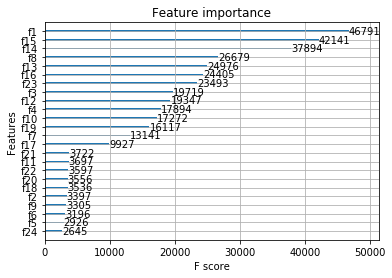

In [9]:
# X_train,X_test,y_train,y_test=train_test_split(features_X,target_Y,test_size=0.25,random_state=42)

# logreg = LogisticRegression()

# logreg.fit(X_train, y_train)

# y_pred = logreg.predict(X_test)

model = XGBClassifier(
    learning_rate =0.0075, 
    n_estimators=5000, 
    max_depth=29,
    min_child_weight=0, 
    gamma=0.01, 
    subsample=0.82, 
    colsample_bytree=0.22,
    objective= 'binary:logistic', 
    nthread=16, 
    scale_pos_weight=1, 
    seed=1968,
    reg_alpha = 0, 
    reg_lambda = 1
)

# model_forest = RandomForestClassifier()
# model_forest.fit(predictors, target_Y)


modelfit(model,dataset,predictors)



plot_importance(model)
pyplot.show()
# print("Beginning K-Fold")
# kfold = KFold(n_splits=10, random_state=42)
# results = cross_val_score(model, features_X, target_Y, cv=kfold, scoring='roc_auc')
# print(results)
# print(results.mean())
# print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [6]:

    #SUBMISSION #ALL FEATURES 
    learning_rate =0.01, 
    n_estimators=10000, 
    max_depth=29,
    min_child_weight=0, 
    gamma=0.01, 
    subsample=0.82, 
    colsample_bytree=0.22,
    objective= 'binary:logistic', 
    nthread=16, 
    scale_pos_weight=1, 
    seed=21,
    reg_alpha = 0, 
    reg_lambda = 1
    
    0.91021436288286
    Accuracy: 91.02% (1.47%)
        
    
    #PROVIDED LOWER KAGGLE SCORE 
    learning_rate =0.009, 
    n_estimators=5000, 
    max_depth=25,
    min_child_weight=1, 
    gamma=0.0, 
    subsample=0.85, 
    colsample_bytree=0.25,
    objective= 'binary:logistic', 
    nthread=16, 
    scale_pos_weight=1, 
    seed=42,
#     reg_alpha = .0002,
    reg_lambda = 0
    
    0.9093369616321241
    Accuracy: 90.93% (1.49%)
        
    

IndentationError: unexpected indent (<ipython-input-6-cb28fcd8c826>, line 3)

In [116]:
print(results)
print(results.mean())
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.91348638 0.89155491 0.88836015 0.93016598 0.91732702 0.92284383
 0.89692896 0.89636949 0.92652319 0.92816451]
0.9111724416867011
Accuracy: 91.12% (1.55%)


In [117]:
submitModelPredict = model.predict_proba(test_feature)
submission = pd.DataFrame({'Id': test_Id, 'Y':submitModelPredict[:,1]})
submission.head()

,Id,Y
0,16384,0.973561
1,16385,0.961064
2,16386,0.999898
3,16387,0.999882
4,16388,0.998089


In [118]:
filename = 'submit2.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: submit2.csv
